# Test imports, configs, etc

In [2]:
# custom classes
from SatellitesDataset import get_test_dataset,get_train_dataset,SatellitesDataset
from SatellitesAugs import SatellitesTrainAugmentation,SatellitesTestAugmentation
from Loss import BCEDiceLoss
from LinkNet import LinkNet34
from UNet import UNet11
from presets import preset_dict

preset = 'rgb_ps'
bit8_imgs,bit8_masks,cty_no = get_train_dataset(preset,preset_dict)
or_imgs,cty_no_mask = get_test_dataset(preset,preset_dict)
len(bit8_imgs),len(bit8_masks),len(cty_no),len(or_imgs),len(cty_no_mask)

from sklearn.model_selection import train_test_split

train_imgs, val_imgs, train_masks, val_masks = train_test_split(bit8_imgs,
                                                                bit8_masks,
                                                                test_size=0.2,
                                                                stratify = cty_no,
                                                                random_state=42)

len(train_imgs),len(train_masks)

train_augs = SatellitesTrainAugmentation(shape=1280,
                                         aug_scheme = None
                                        )

val_augs = SatellitesTestAugmentation(shape=1280)

dataset = SatellitesDataset(preset = preset_dict[preset],
            image_paths = train_imgs,
             mask_paths = train_masks,                 
             transforms = train_augs,
            )

Augmentations are NOT enabled for train


In [6]:
import pandas as pd
pd.DataFrame(cty_no)[0].value_counts()

3    1028
0     981
1     283
2     257
Name: 0, dtype: int64

In [4]:
import random

img,mask  = dataset.__getitem__(random.randint(0,100))

In [7]:
mask

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.85227275, 0.85227275,
        0.85227275],
       [0.        , 0.        , 0.        , ..., 0.85227275, 0.85227275,
        0.85227275],
       [0.        , 0.        , 0.        , ..., 0.01704546, 0.01704546,
        0.01704546]], dtype=float32)

start
image processing complete 0.12017488479614258


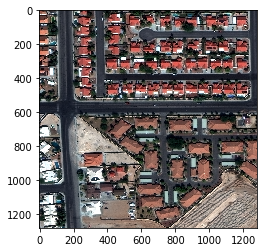

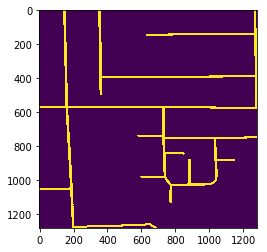

plotting complete 0.42572522163391113


In [25]:
import matplotlib.pyplot as plt
import time
import random
import numpy as np

start = time.time()
print("start")

img,mask  = dataset.__getitem__(random.randint(0,100))

end = time.time()
print('image processing complete', end - start)

img = img.cpu().numpy().astype(np.float32).transpose((1, 2, 0))
img += -img.min()
img *= (1/img.max())

plt.imshow(img)
plt.show()

mask = mask.cpu().numpy().astype(np.float32).transpose((1, 2, 0))[:,:,0]
mask += -mask.min()
mask *= (1/mask.max())

plt.imshow(mask)
plt.show()

end = time.time()
print('plotting complete', end - start)

In [4]:
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

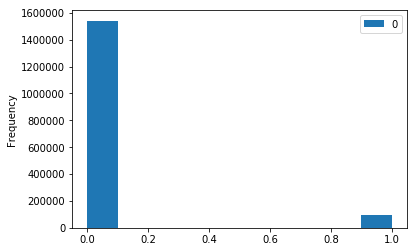

In [5]:
import pandas as pd

df = pd.DataFrame(mask.reshape(-1,1))
df.plot(kind='hist')
plt.show()

In [6]:
img,mask  = dataset.__getitem__(random.randint(0,100))

In [11]:
mask.min()

0.0

In [26]:
1280*1280

1638400

In [23]:
(np.asarray(mask) > 0.5).astype(np.uint8).sum()

122794

In [12]:
test.astype(np.uint8)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [25]:
    print('Train images: {}\t'
          'Train  masks: {}\t'
          'Val   images: {}\t'
          'Val    masks: {}\t'.format(len([1]),len([1]),
                                      len([1]),len([1])))

Train images: 1	Train  masks: 1	Val   images: 1	Val    masks: 1	


In [27]:
import shutil

shutil.rmtree('tb_logs/test/')

PermissionError: [Errno 13] Permission denied: 'events.out.tfevents.1515653499.4c3715934f1a'